In [70]:
# from sklearn.datasets import load_iris
# iris = load_iris(as_frame=True)

import pandas as pd
import numpy as np

df = pd.read_csv('iris.csv')

np.random.shuffle(df.values)

In [71]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [73]:
df.drop(columns="Id", inplace=True)

In [74]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [75]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [76]:
X = df.drop(columns=["Species"])
Y = df["Species"]

In [77]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

Y = label_encoder.fit_transform(Y)

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [103]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[4]),      # input_shape=(4,)
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(3, activation="sigmoid")
])

In [104]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 4)                 0         
                                                                 
 dense_21 (Dense)            (None, 10)                50        
                                                                 
 dense_22 (Dense)            (None, 3)                 33        
                                                                 
Total params: 83 (332.00 Byte)
Trainable params: 83 (332.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


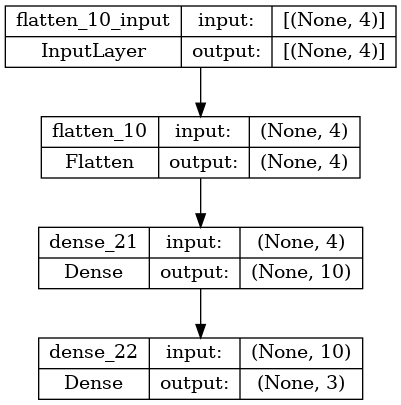

In [105]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [106]:
weights, biases = model.layers[1].get_weights()
weights

array([[-0.50944734,  0.28482848,  0.59242284, -0.4848642 , -0.37271053,
        -0.378489  ,  0.07632017,  0.5127988 ,  0.52835786, -0.18551812],
       [ 0.38877928, -0.37699762,  0.08647043,  0.30382764,  0.4575014 ,
         0.42350757,  0.25137895,  0.57035124, -0.54179573, -0.4399074 ],
       [ 0.0221864 ,  0.05460751,  0.40715623,  0.4401592 , -0.49844235,
        -0.6000924 ,  0.02720141,  0.4760971 , -0.20205465, -0.32558745],
       [ 0.4607817 , -0.06831205, -0.5303846 , -0.47358418, -0.04699057,
        -0.46986228,  0.6159016 ,  0.4420637 ,  0.5051626 ,  0.20489502]],
      dtype=float32)

In [107]:
weights.shape

(4, 10)

In [108]:
biases.shape

(10,)

In [109]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [110]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)

history = model.fit(X_train, Y_train, epochs=300, callbacks=[early_stopping])

Epoch 1/300


4/4 [==============================] - 2s 12ms/step - loss: 1.7397 - accuracy: 0.3250
Epoch 2/300
4/4 [==============================] - 0s 9ms/step - loss: 1.2147 - accuracy: 0.3167
Epoch 3/300
4/4 [==============================] - 0s 10ms/step - loss: 1.0716 - accuracy: 0.3333
Epoch 4/300
4/4 [==============================] - 0s 10ms/step - loss: 1.0426 - accuracy: 0.2250
Epoch 5/300
4/4 [==============================] - 0s 9ms/step - loss: 1.0176 - accuracy: 0.3083
Epoch 6/300
4/4 [==============================] - 0s 12ms/step - loss: 0.9805 - accuracy: 0.4083
Epoch 7/300
4/4 [==============================] - 0s 8ms/step - loss: 0.9548 - accuracy: 0.3417
Epoch 8/300
4/4 [==============================] - 0s 10ms/step - loss: 0.9495 - accuracy: 0.4750
Epoch 9/300
4/4 [==============================] - 0s 9ms/step - loss: 0.9309 - accuracy: 0.5000
Epoch 10/300
4/4 [==============================] - 0s 9ms/step - loss: 0.9039 - accuracy: 0.5083
Epoch 11/300
4/4 [==================

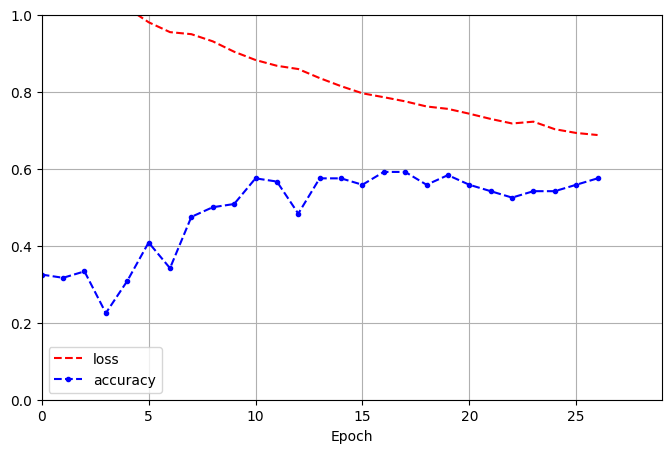

In [111]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "b--."])
plt.legend(loc="lower left")
plt.show()

In [112]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 132ms/step - loss: 0.7964 - accuracy: 0.4333


[0.796415388584137, 0.4333333373069763]